In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gdmdata-stitched/GDM_stitched_dataset.csv


In [2]:
# Importing the required packages 
import numpy as np 
import pandas as pd 

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [4]:
# Function importing Dataset 
def importdata(): 
    GDM_data = pd.read_csv('../input/gdmdata-stitched/GDM_stitched_dataset.csv')
    GDM_data = GDM_data.drop('Height(cm)', axis =1)
    GDM_data = GDM_data.drop('Weight(kgs)', axis =1)
    return GDM_data

In [5]:
# Function to split the dataset 
def splitdataset(balance_data): 
  
    # Separating the target variable 
    X = balance_data.drop('GDM', axis =1)

    Y = balance_data['GDM']
  
    # Splitting the dataset into train and test 
    X_train, X_test, Y_train, Y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, Y_train, Y_test

# ****Decision Tree Classfier****


In [6]:
# Function to perform training with giniIndex. 
def train_using_gini(X_train, X_test, Y_train): 
  
    # Creating the classifier object 
    clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=10, min_samples_leaf=5) 
  
    # Performing training 
    clf_gini.fit(X_train, Y_train) 
    return clf_gini 

In [7]:
# Function to perform training with entropy. 
def train_using_entropy(X_train, X_test, Y_train): 
  
    # Decision tree with entropy 
    clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 10, min_samples_leaf = 5) 
  
    # Performing training 
    clf_entropy.fit(X_train, Y_train) 
    return clf_entropy 

In [8]:
# Function to make predictions 
def prediction(X_test, clf_object): 
  
    # Predicton on test with giniIndex 
    Y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(Y_pred) 
    return Y_pred  

In [9]:
# Function to calculate accuracy 
def cal_accuracy(y_test, Y_pred): 
              
    print ("Accuracy : ", 
    accuracy_score(y_test,Y_pred)*100) 
      

In [10]:
def printTree(classifier):
    
    feature_names = ['Age','Ethnicity','BMI','Diastolic BP','Systolic BP', 'Pregnancies','Miscarriage','PreviousGDM',
                     'Family History','Exercise']
    target_names = ['GDM-Yes','GDM-No']
    
    #Build the tree
    dot_data = tree.export_graphviz(classifier, out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names, filled = True)
    #Draw tree
    tr = graphviz.Source(dot_data, format ="png")
    return tr

In [11]:
# Building Phase 
data = importdata() 

#Shuffle the dataset 
#data = data.sample(frac = 1)

X, Y, X_train, X_test, Y_train, Y_test = splitdataset(data) 
clf_gini = train_using_gini(X_train, X_test, Y_train) 
clf_entropy = train_using_entropy(X_train, X_test, Y_train) 

# Operational Phase 
print("Results Using Gini Index:") 

# Prediction using gini 
y_pred_gini = prediction(X_test, clf_gini) 
cal_accuracy(Y_test, y_pred_gini) 


print("Results Using Entropy:") 
# Prediction using entropy 
y_pred_entropy = prediction(X_test, clf_entropy) 
cal_accuracy(Y_test, y_pred_entropy) 



Results Using Gini Index:
Predicted values:
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 0]
Accuracy :  75.90361445783132
Results Using Entropy:
Predicted values:
[0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0]
Accuracy :  78.3132530120482


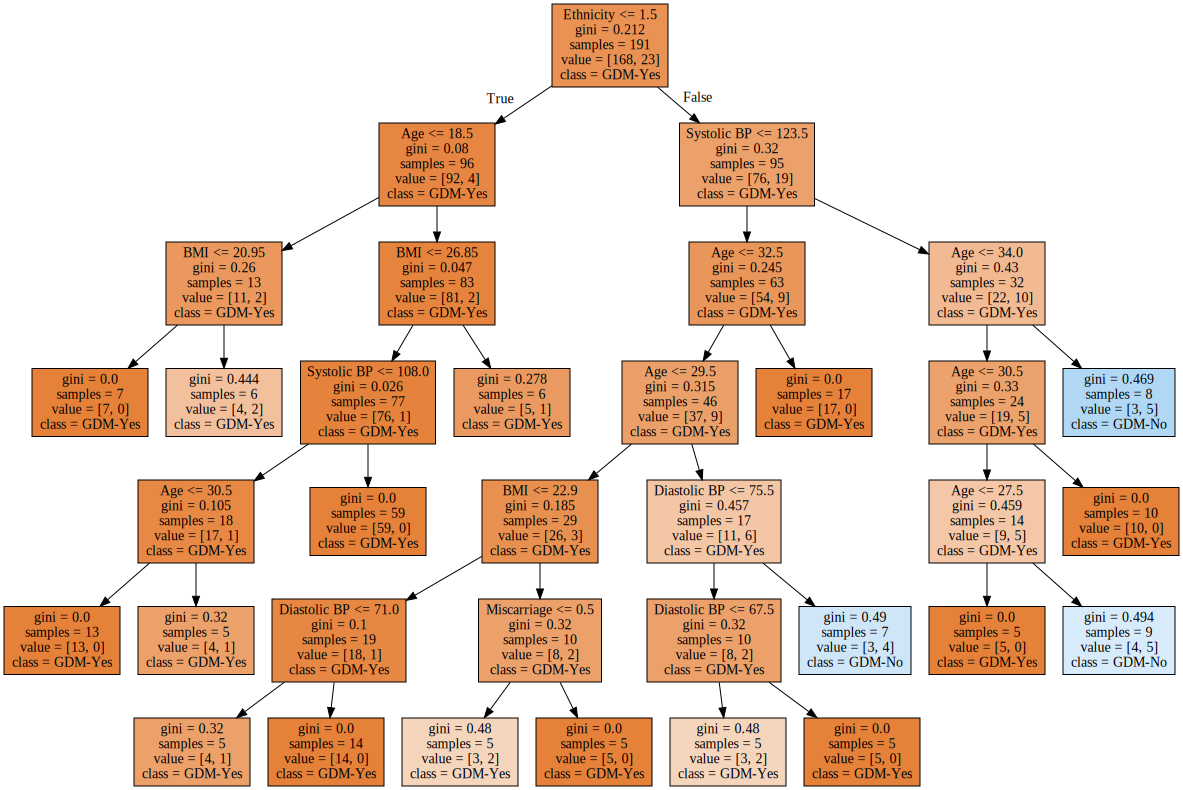

In [12]:
#Print Gini tree
tr_gini = printTree(clf_gini)
tr_gini

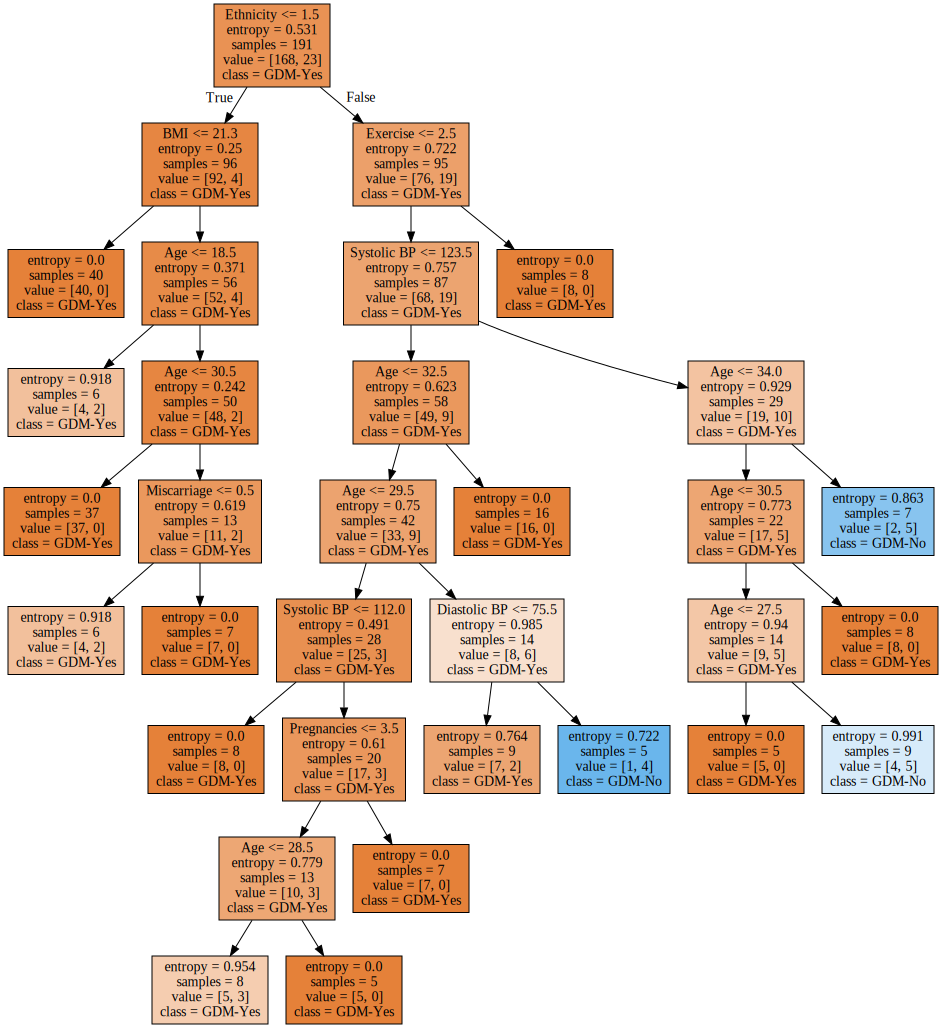

In [13]:
#Print entropy tree
tr_entropy = printTree(clf_entropy)
tr_entropy

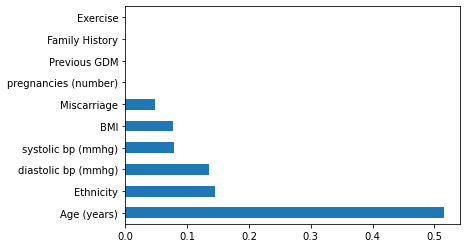

In [14]:
#Feature importance using GINI
importance = clf_gini.feature_importances_

feature_importance = pd.Series(importance, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')

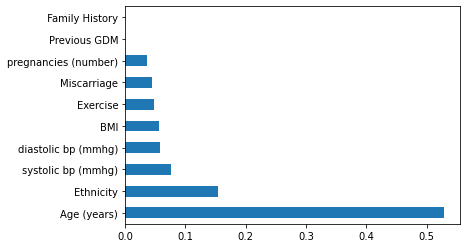

In [15]:
#Feature Importance using Entropy
importance_en = clf_entropy.feature_importances_

feature_importance_en = pd.Series(importance_en, index=X.columns)
feature_importance_en.nlargest(10).plot(kind='barh')

In [16]:
from sklearn import linear_model

model = linear_model.LinearRegression()


In [17]:
model.fit(X_train,Y_train)

LinearRegression()

In [18]:
y_predict = model.predict(X_test)
y_predict[0]

0.0047295395951662406

In [19]:
model.score (X_test, Y_test)

-0.10370846749498863

In [20]:
#DecisionTree Regression

from sklearn import tree
dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

predict_dtr = dtr.predict(X_test)
predict_dtr

dtr.score(X_test, Y_test)

-1.4900000000000002

# ****Random Forest Classifier****

In [21]:
RF = RandomForestClassifier(n_estimators=10,random_state=0)

In [22]:
RF.fit(X_train, Y_train) 

RandomForestClassifier(n_estimators=10, random_state=0)

In [23]:
pred = RF.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, pred))

Accuracy: 0.9036144578313253


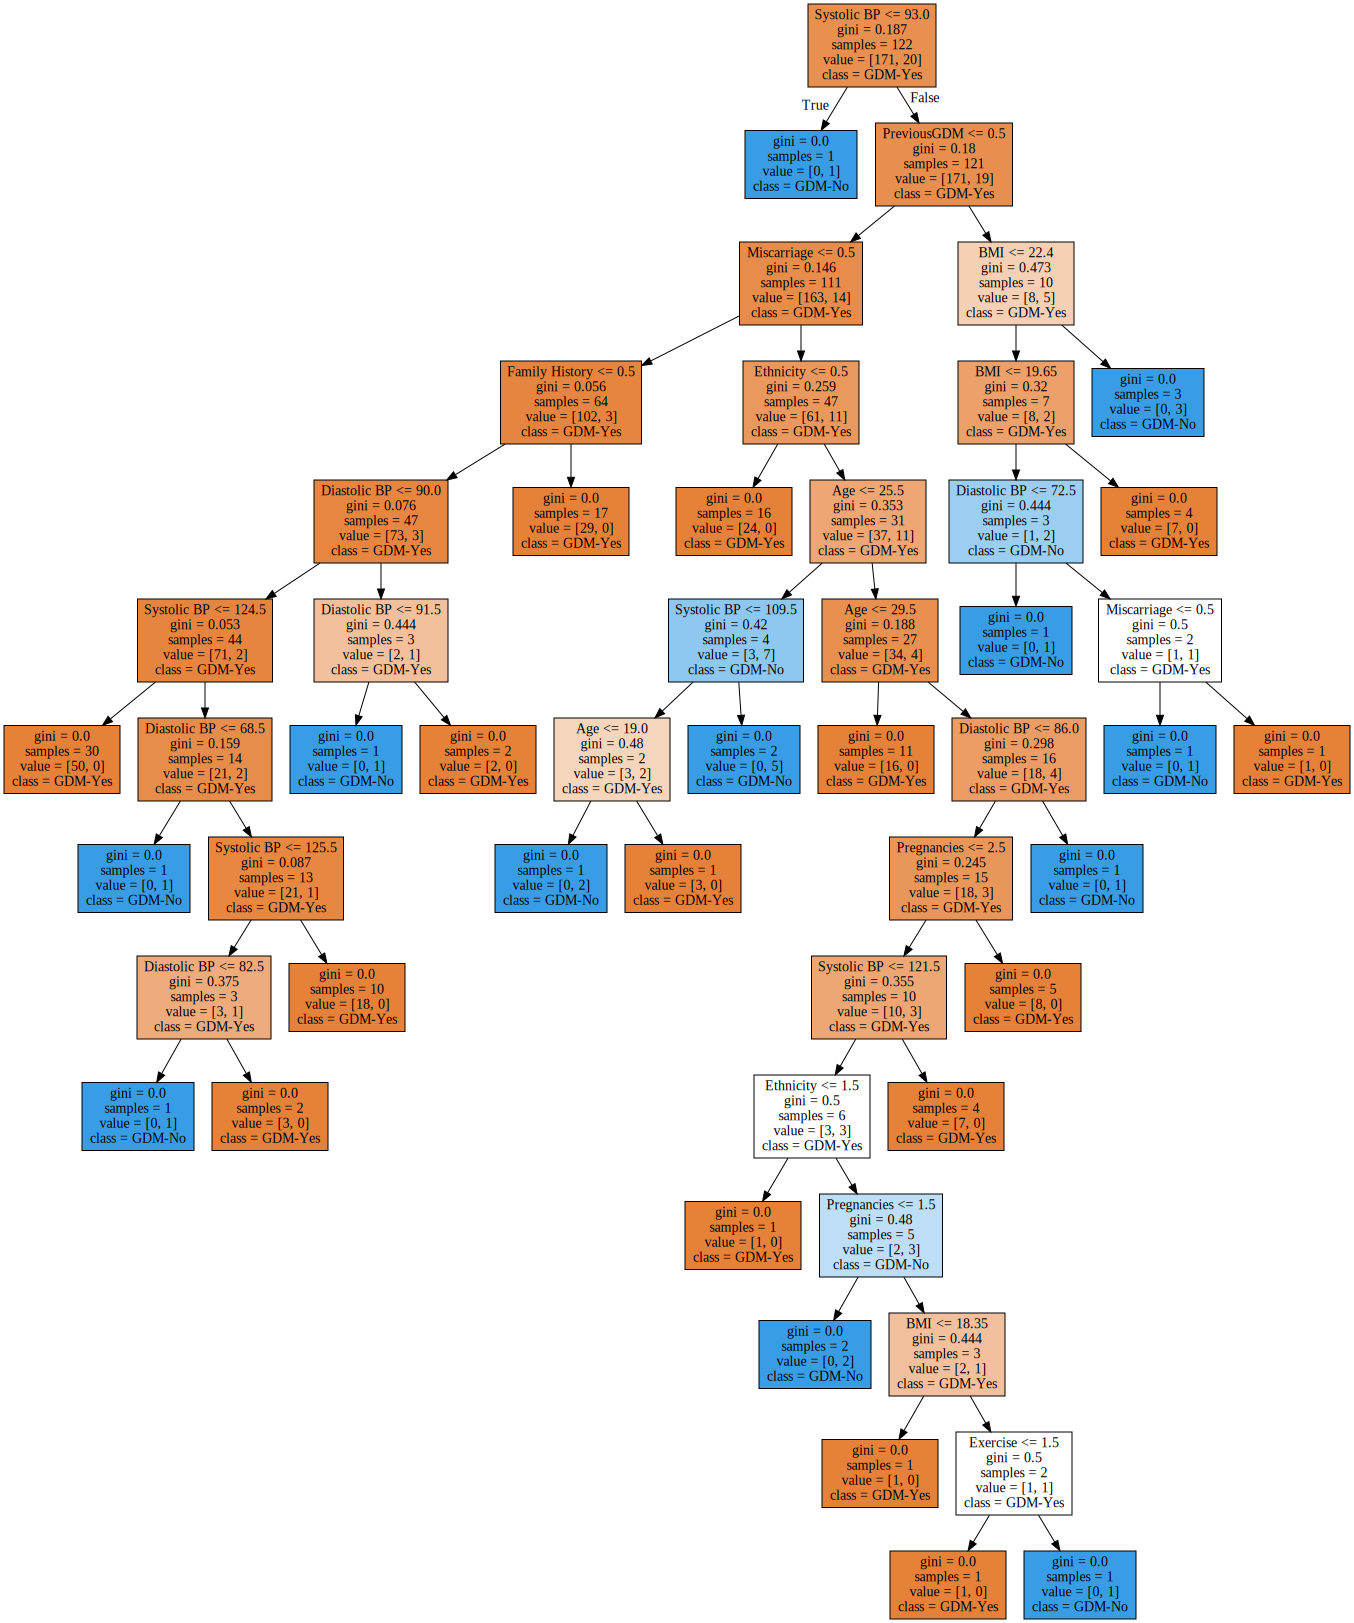

In [25]:
#Print tree
feature_names = ['Age','Ethnicity','BMI','Diastolic BP','Systolic BP', 'Pregnancies','Miscarriage','PreviousGDM',
                     'Family History','Exercise']
target_names = ['GDM-Yes','GDM-No']
    
dot_data = tree.export_graphviz(RF.estimators_[0], out_file=None,
                                    feature_names=feature_names,
                                    class_names=target_names, filled = True)
#Draw tree
tr = graphviz.Source(dot_data, format ="png")
tr
  

In [26]:
#Build all the trees
for i in range(len(RF.estimators_)):
    print(tree.export_text(RF.estimators_[i]))

|--- feature_4 <= 93.00
|   |--- class: 1.0
|--- feature_4 >  93.00
|   |--- feature_7 <= 0.50
|   |   |--- feature_6 <= 0.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- feature_3 <= 90.00
|   |   |   |   |   |--- feature_4 <= 124.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_4 >  124.50
|   |   |   |   |   |   |--- feature_3 <= 68.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_3 >  68.50
|   |   |   |   |   |   |   |--- feature_4 <= 125.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 82.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_3 >  82.50
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_4 >  125.50
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_3 >  90.00
|   |   |   |   |   |--- feature_3 <= 91.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_3 

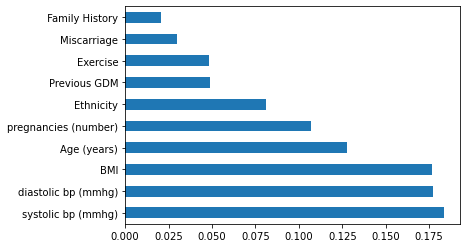

In [27]:
#Feature importance using Random forest
importance_RF = RF.feature_importances_
feature_importance_RF = pd.Series(importance_RF, index=X.columns)
feature_importance_RF.nlargest(10).plot(kind='barh')

In [28]:
print(metrics.classification_report(Y_test, pred))
precision, recall, _ = metrics.precision_recall_curve(Y_test, pred, pos_label=1)
average_precision = metrics.average_precision_score(Y_test, pred)
print (precision)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        75
           1       0.00      0.00      0.00         8

    accuracy                           0.90        83
   macro avg       0.45      0.50      0.47        83
weighted avg       0.82      0.90      0.86        83

[0.09638554 1.        ]


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ****Bagging Classifier****

In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
bag_clf=BaggingClassifier(base_estimator= clf_gini, n_estimators=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train,Y_train)
print ("Accuracy : ", accuracy_score(Y_test,bag_clf.predict(X_test)))

Accuracy :  0.9036144578313253
